# mrmention 사이트 리뷰분석

 참조사이트
 - https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

In [325]:
# !pip install matplotlib seaborn sklearn konlpy scikit-learn wordcloud pyLDAvis gensim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from wordcloud import WordCloud, STOPWORDS

In [326]:
dong_list = '건입동 내도동 노형동 도남동 도두이동 도두일동 도련이동 도련일동 도평동 봉개동 삼도이동 삼도일동 삼양삼동 삼양이동 삼양일동 아라이동 아라일동 연동 영평동 오등동 오라삼동 오라이동 오라일동 외도이동 외도일동 용강동 용담삼동 용담이동 용담일동 월평동 이도이동 이도일동 이호이동 이호일동 일도이동 일도일동 해안동 화북이동 화북일동 회천동 구좌읍 애월읍 우도면 조천읍 추자면 한경면 한림읍'
dong_list = dong_list.split(" ")

for i in dong_list:
    if (i.find('읍')) > 0 or (i.find('면') > 0):
        print(i)

구좌읍
애월읍
우도면
조천읍
추자면
한경면
한림읍


In [327]:
df = pd.read_csv('./data/naver_month.csv')
df

,title,contents,time,blog_text,key
0,돌아기랑 제주도한달살기 24일째(406일) : 비양도,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,2023.11.27,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,한달살기
1,"제주도 한달살기 (20) - 우도 코코나라, 문빵구, 돌담집, 몬딱...",한달살기 중 두번째 우도 ㅎㅎ 처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 ...,2023.11.07,한달살기 중 두번째 우도 ㅎㅎ처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 앉...,한달살기
2,제주동쪽숙소 제주도한달살기하기 좋은 구좌 제주오션뷰2차♪,#제주오션뷰2차 #제주도펜션 #제주동쪽숙소 제주에는 크게 동쪽과 서쪽으로 나뉘면서 ...,2023.12.13,#제주오션뷰2차#제주도펜션#제주동쪽숙소제주에는 크게 동쪽과 서쪽으로 나뉘면서 다양한...,한달살기
3,제주도 한달살기 비용 (한달살이 생활비),제주도 한달살기는 돈이 적게 들지는 않지만 우리 가족에게 꽤 많은 추억을 남겼으므로...,2022.02.23,"2021년 4월에 제주도 한달살기를 하고 왔다.세식구 기준(어른 둘, 아기 하나)으...",한달살기
4,제주도 한달살기 숙소 비용 제주 중문 애견동반 더맨션 이이공공,그중에서도 제일 마음에 들었던 건 오후 시간 깊숙이 들어오는 가을 햇살 창밖에 보이...,2023.10.14,이번에는 좀 여유로운 여행을 하고 싶어서다소 긴 일정으로 제주도에 방문했어요.여행...,한달살기
...,...,...,...,...,...
1932,제주도한달살이,드뎌 육지다~ 뒤로 보이는 육지가 제주항이네요. 3다도인 제주에 좋은 추억도 많이 ...,2020.12.18,#제주도 #제주한달살이#실버크클라우드코로나19로 발이묶인 윈드서퍼들의차선택은~~ 한...,한달살이
1933,[제주도 한달살이] 제주도 게스트하우스 스텝 후기...,"연돈 예약 성공해서 연돈도 먹고, 한라산 등산도 가고, 스쿠버다이빙도 배우고, 저녁...",2023.05.28,22년12월28일~23년2월4일약 한달동안 제주살이를 했다.(글 마지막에 스텝 꿀팁...,한달살이
1934,제주도 한달살이 시작!!!,무계획으로 출발 하는 제주도 한달살이!!! 퇴사를 하고 나니 새로운 환경에서 살아보...,2022.03.16,무계획으로 출발 하는 제주도 한달살이!!!퇴사를 하고 나니 새로운 환경에서 살아보고...,한달살이
1935,[제주도 한달살이 이야기] 평산제면소에서 마제소바먹고 러닝후...,제주도에선 술 잘 안먹겠다고 다짐했는데 거의 하루 한캔은 아니여도 한모금씩은 매일 ...,2022.02.20,오늘은 숙소 근처에 있다는 마제소바 집에 들렸어요맛집이라고 해서 저번에 왔었는데그때...,한달살이


In [328]:
# df 수집 오류 결과 확인
(df == 'error').sum()

title        0
contents     0
time         0
blog_text    0
key          0
dtype: int64

In [329]:
df.isnull().sum()
# blog_text가 nan인 행 존재 -> 제외

title        0
contents     0
time         0
blog_text    3
key          0
dtype: int64

In [330]:
df[df['blog_text'].isna() == 1]

,title,contents,time,blog_text,key
1807,제주도 한달살이 스물한번째 날,제주도 한달살이 스물한번째 날입니다 오늘은 제주도에 오후부터 비가 예보 되있어서 나...,2022.03.30,NaN,한달살이
1882,제주도 한달살이 스물여덟번째 날,제주도 한달살이 스물여덟번째 날입니다 이제 제주도 살이 삼일 남았습니다 이번주는 날...,2022.04.07,NaN,한달살이
1919,제주도 한달살이 열다섯번째 날,제주도 한달살이 열다섯번째 날 입니다 벌써 한달중 절반이 지나가는군요 아침에 일어나...,2022.03.24,NaN,한달살이


In [331]:
# blog_text가 nan인 겨우 제외
df = df[df['blog_text'].isna() != 1]

## 분석 시작

#### 리뷰 긍부정

In [332]:
df['blog_text'][0]

'첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘은 어디가지? 하다가 바양반이 안가봤다는 비양도를 가보기로 했다. ㅋㅋ나는 안가본 섬이 많지만 바양반은 자전거 타고 제주도 일주를 하기도 햇고 제주도를 많이 와보기도 해서 안가본데가 없음...ㅋㅋ암튼 그리하여 아침에 급 결정된 비양도 나들이! 아침에 급하게 결정된 브런치집근처 에이바우트뷰에 커피+샌드위치/샐러드 먹으러 갓는데 아무것도 없어...ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ7시 30분쯤이라서 좀 이른시간이기도 했지만,,그래서 그냥 집으로 고고싱 다정이네 김밥 맛잇다고 해서 또 급 사보기로 햇다.다정이네 김밥 서귀포신시가지점 앞에 전화주문이 엄청 많아가지고 ...김밥사는데 10~15분은 기다린 듯 하다..ㄷㄷ와 나도 전화주문하고 올걸...주문 하려는데 주문받으시는 분도 없으시고 김밥싸는 분은 김밥싸느라 정신없고튀김하시는 분도 튀기느라 정신없고 ㅋㅋ엄청 장사가 잘 되는 모양이다. 난 다정이네김밥 3500원 1줄과불제김밥 6000원 1줄 구매불제김밥은 불고기+제육 반반 김밥이였음 오 밥 되게 적고 반찬 많다.맛은 나쁘지 않앗는데 6000원이면 좀 비싸다. 다정이네김밥은 달걀 많이 넣은 김밥맛이 갠츈한 편요즘 김밥 가격도 꽤 비싸니 말이쥐..ㅠ 비양도 갈 준비 하는 동안 또랑이는 혼자 장난감 가지고 놀다가..클래식 연주를 구경한다. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ바양반은 맨날 클래식을 틀어 놓더라.. 한림항까지 가는데... 1시간 정도는 가야되서 또랑이 낮잠시간에 맞춰서 갔다.1시간 넘게 자고 일어났다.한림항 도착하자마자 일어나주는 센스!! 비양도 운항 시간표2천년호와 비양도호이렇게 배가 2개나 있었다.3시간 간격으로 출발하는 배였는데 난 12시 배를 구매했다. 왕복 승선권이니 잘 가지고 있다가 돌아오는 배에서도 꼭 보여주긔!배는 15분만 타고 가면 되서 또랑이도 무리 없이 탈 수 잇을것 같아 비양도 선택!!갈때는 배가 많이 흔들렸지만 밖에 서있어서 무난하게 잘 도착했따.12시 배를 예약하니 돌아오는 배

### 전처리 시작

In [333]:
def hangul_function(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [334]:
hangul_function(df['blog_text'][0])

'첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘은 어디가지 하다가 바양반이 안가봤다는 비양도를 가보기로 했다 ㅋㅋ나는 안가본 섬이 많지만 바양반은 자전거 타고 제주도 일주를 하기도 햇고 제주도를 많이 와보기도 해서 안가본데가 없음ㅋㅋ암튼 그리하여 아침에 급 결정된 비양도 나들이 아침에 급하게 결정된 브런치집근처 에이바우트뷰에 커피샌드위치샐러드 먹으러 갓는데 아무것도 없어ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ시 분쯤이라서 좀 이른시간이기도 했지만그래서 그냥 집으로 고고싱 다정이네 김밥 맛잇다고 해서 또 급 사보기로 햇다다정이네 김밥 서귀포신시가지점 앞에 전화주문이 엄청 많아가지고 김밥사는데 분은 기다린 듯 하다ㄷㄷ와 나도 전화주문하고 올걸주문 하려는데 주문받으시는 분도 없으시고 김밥싸는 분은 김밥싸느라 정신없고튀김하시는 분도 튀기느라 정신없고 ㅋㅋ엄청 장사가 잘 되는 모양이다 난 다정이네김밥 원 줄과불제김밥 원 줄 구매불제김밥은 불고기제육 반반 김밥이였음 오 밥 되게 적고 반찬 많다맛은 나쁘지 않앗는데 원이면 좀 비싸다 다정이네김밥은 달걀 많이 넣은 김밥맛이 갠츈한 편요즘 김밥 가격도 꽤 비싸니 말이쥐ㅠ 비양도 갈 준비 하는 동안 또랑이는 혼자 장난감 가지고 놀다가클래식 연주를 구경한다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ바양반은 맨날 클래식을 틀어 놓더라 한림항까지 가는데 시간 정도는 가야되서 또랑이 낮잠시간에 맞춰서 갔다시간 넘게 자고 일어났다한림항 도착하자마자 일어나주는 센스 비양도 운항 시간표천년호와 비양도호이렇게 배가 개나 있었다시간 간격으로 출발하는 배였는데 난 시 배를 구매했다 왕복 승선권이니 잘 가지고 있다가 돌아오는 배에서도 꼭 보여주긔배는 분만 타고 가면 되서 또랑이도 무리 없이 탈 수 잇을것 같아 비양도 선택갈때는 배가 많이 흔들렸지만 밖에 서있어서 무난하게 잘 도착했따시 배를 예약하니 돌아오는 배편은 시 분 예약이였다박 하는 사람들은 미리 예매할때 말하라고 함 우리가 탈 배와 인증샷 천년호 층배였는데 다른 배를 보니 층배도 잇엇다 층은

In [335]:
from konlpy.tag import Okt
from collections import Counter

In [336]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(hangul_function(df['blog_text'][0]))
nouns

['첨',
 '제주도',
 '달',
 '살기',
 '때',
 '어디',
 '생각',
 '안',
 '매번',
 '전날',
 '아침',
 '오늘',
 '어디가',
 '바',
 '양반',
 '비양도',
 '나',
 '섬',
 '바',
 '양반',
 '자전거',
 '타고',
 '제주도',
 '일주',
 '햇',
 '제주도',
 '보기',
 '아침',
 '급',
 '결정',
 '비양도',
 '나들이',
 '아침',
 '결정',
 '브런치',
 '집',
 '근처',
 '에이',
 '바우트',
 '뷰',
 '커피',
 '샌드위치',
 '샐러드',
 '갓',
 '것',
 '시',
 '분',
 '좀',
 '시간',
 '그냥',
 '집',
 '고고싱',
 '다정',
 '김밥',
 '맛',
 '또',
 '급',
 '햇',
 '다다',
 '정이',
 '김밥',
 '서귀포',
 '신시',
 '지점',
 '앞',
 '전화',
 '주문',
 '김밥',
 '분',
 '듯',
 '전화',
 '주문',
 '걸',
 '주문',
 '주문',
 '분도',
 '김밥',
 '분',
 '김밥',
 '정신',
 '분도',
 '정신',
 '장사',
 '모양',
 '난',
 '다정',
 '김밥',
 '원',
 '줄',
 '불제',
 '김밥',
 '원',
 '줄',
 '불',
 '김밥',
 '불고기',
 '제육',
 '반',
 '김밥',
 '오',
 '밥',
 '반찬',
 '맛',
 '이면',
 '좀',
 '다정',
 '김밥',
 '달걀',
 '김밥',
 '맛',
 '갠츈',
 '편',
 '요즘',
 '김밥',
 '가격',
 '꽤',
 '말',
 '쥐',
 '비양도',
 '준비',
 '동안',
 '또',
 '혼자',
 '장난감',
 '가지',
 '클래식',
 '연주',
 '구경',
 '바',
 '양반',
 '클래식',
 '한림',
 '항',
 '시간',
 '정도',
 '가야',
 '또',
 '낮잠',
 '시간',
 '시간',
 '자고',
 '한림',
 '항',
 '도착',
 '자마자',
 '센스',
 '비양도

In [337]:
# review 전체
# 말뭉치 생성
corpus = "".join(df['blog_text'].tolist())

In [338]:
nouns = okt.nouns(hangul_function(corpus))
counter = Counter(nouns)
counter.most_common(10)


[('제주도', 10868),
 ('달', 8680),
 ('제주', 6136),
 ('곳', 5925),
 ('숙소', 5782),
 ('살기', 5453),
 ('수', 5275),
 ('것', 4805),
 ('살이', 3129),
 ('여행', 3118)]

In [339]:
# 2글자 이상인 단어중 가장 많이 나오는 단어를 보여주기

available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(20)


[('제주도', 10868),
 ('제주', 6136),
 ('숙소', 5782),
 ('살기', 5453),
 ('살이', 3129),
 ('여행', 3118),
 ('시간', 3029),
 ('사진', 2691),
 ('아이', 2436),
 ('생각', 2374),
 ('카페', 2280),
 ('바다', 2201),
 ('정말', 2006),
 ('사람', 1967),
 ('정도', 1681),
 ('우리', 1602),
 ('바로', 1532),
 ('여기', 1387),
 ('오늘', 1379),
 ('진짜', 1307)]

In [340]:
web_stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
web_stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [341]:
stopwords = set([])
for i in web_stopwords:
    stopwords.add(i[0])

len(stopwords)

594

In [342]:
with open('./stopwords_korean.txt', encoding='utf-8') as file:
    korean_stopwords = file.read()

korean_stopwords = set(korean_stopwords.split("\n"))

In [343]:
stopwords.update(korean_stopwords)
len(stopwords)

595

In [367]:
# 불용어 추가
jeju_stopwords = ['제주', '제주도',  '리뷰', '숙소', '여행', '트립', '정말', '동안', '다음', '바로', '근처', '조금', '시간',
                   '호스트', '정도', '방문', '사장', '이용', '다시', '예약', '살이', '살기', '아주', '추천', '하루', '이번',
                   '처음', '달동', '저희', '하나', '사용', '모두', '진짜', '일주일', '보름', '선택', '시작', '한번', '가장', '마음',
                   '제외', '이동', '무엇', '준비', '그냥', '감사', '생각', '느낌', '덕분', '후기', '기회',  '다른', '여기', '우리',
                   '미스터', '미스터멘션', '멘션', '때문', '오늘', '도착', '보고', '마지막', '가지', '이제', '지금', '모습', '위해',
                   '타고', '사실', '포스팅', '주문', '역시', '침대', '거실', '매일', '출발', '소개', '기억', '참고', '계속', '객실',
                   '일차', '이야기', '요즘', '이유', '경우', '일단', '거의', '스텝', '제일', '자주', '어디', '마무리', '아래', '운영',
                   '이상', '의자', '별로', '원래', '중간', '뭔가', '첫째', '체크', '잠시', '언제', '살짝', '해도', '계단', '부분', '냉장고',
                    '침실', '기본', '제공', '일찍', '인테리어', '완전', '추가', '등등', '매우', '가야', '그때', '기간', '마치', '가득', '대부분',
                    '미리', '둘째', '근무', '공간', '스테이', '알파', '엄마', '아빠', '아들', '일정', '계획', '아침',
                     '점심', '저녁', '자리', '두리', '언니', '가격', '건물', '언니', 
                      '숙박', '만원', '가기', '독채','화장실', '욕실', '숙박', '세탁기', '코로나' ,
                     '주방', '도서관', '서울',
                     '호텔', '펜션', '게스트하우스']
for word in jeju_stopwords:
    stopwords.add(word)

# '호텔', '펜션', '게스트하우스',

In [345]:
# 여러번 반복후 불용어 추가
result = [word for word in nouns if not word in stopwords]
counter = Counter(result)
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(30)

[('사진', 2691),
 ('아이', 2436),
 ('카페', 2280),
 ('바다', 2201),
 ('사람', 1967),
 ('맛집', 1192),
 ('혼자', 1035),
 ('날씨', 978),
 ('가족', 948),
 ('친구', 915),
 ('위치', 902),
 ('코스', 888),
 ('오름', 872),
 ('호텔', 821),
 ('서귀포', 818),
 ('거리', 812),
 ('해수욕장', 775),
 ('해변', 756),
 ('커피', 717),
 ('풍경', 706),
 ('구경', 695),
 ('아기', 693),
 ('펜션', 689),
 ('비용', 687),
 ('주차', 672),
 ('식당', 671),
 ('바람', 661),
 ('화장실', 648),
 ('산책', 634),
 ('분위기', 613)]

In [346]:
df_word = pd.DataFrame.from_dict(available_counter, orient='index' ).reset_index()
df_word.columns = ['noun', 'cnt']
df_word.sort_values('cnt', ascending= False, inplace=True)
df_word.to_csv('./data/jeju_words.csv')


In [347]:
keyword_list1 = ['바다', '해수욕장', '숲길', '오름', '한라산']
keyword_list2 = ['식당', '맛집', '카페', '밥']
keyword_list3 = ['사진', '체험', '관광']
keyword_list4 = ['은행', '마트', '편의점', '병원', '약국', '날씨','미세먼지']
keyword_list5 = ['구좌', '애월', '우도', '성산', '안덕', '표선', '제주시', '서귀포']

#keyword_list = keyword_list1 + keyword_list2 + keyword_list3 + keyword_list4
keyword_list = []
keyword_list.extend([keyword_list1, keyword_list2, keyword_list3, keyword_list4, keyword_list5])

In [348]:
text_result = []
for lis in keyword_list:
    text_result.append({'keyword' : '-',
                        'nouns_cnt' : '-',
                        'blog_cnt' : '-'})
    for keyword in lis:
        blog_in = len(df[df['blog_text'].str.find(f'{keyword}') > 0])   
        text_result.append({'keyword' : keyword,
                            'nouns_cnt' : counter[f'{keyword}'],
                            'blog_cnt' : blog_in})
    
        
pd.DataFrame(text_result)    

,keyword,nouns_cnt,blog_cnt
0,-,-,-
1,바다,2201,828
2,해수욕장,775,366
3,숲길,310,114
4,오름,872,306
5,한라산,549,265
6,-,-,-
7,식당,671,377
8,맛집,1192,548
9,카페,2280,745


In [349]:
cloud_nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
cloud_nouns = [x for x in cloud_nouns if x not in stopwords]
cloud_nouns2 = " ".join(cloud_nouns)

In [350]:
# 워드 클라우드

wc = WordCloud(
    font_path='c://Windows/Fonts/gulim.ttc',
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate(cloud_nouns2)

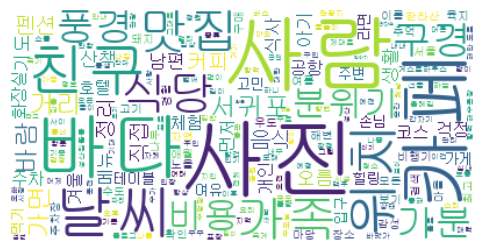

In [351]:
plt.figure(figsize=(6,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


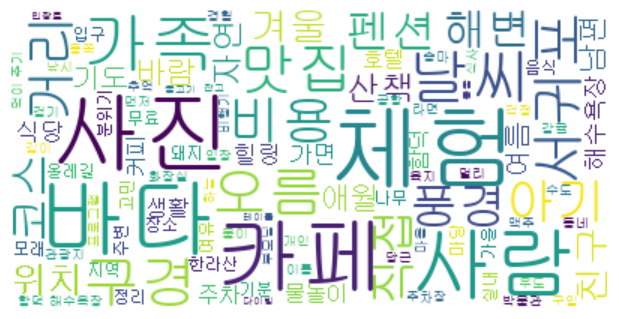

In [352]:
# 키워드에 따라 워드클라우드 그려보기

search_word = '체험'
df_temp = df[df['blog_text'].str.find(search_word) > 0]

### 특정 키워드의 워드클라우드 나타내기
temp_corpus = "".join(df_temp['blog_text'].tolist())
temp_nouns = okt.nouns(hangul_function(temp_corpus))
temp_counter = Counter(temp_nouns)

temp_result = [word for word in temp_nouns if not word in jeju_stopwords]

temp_counter = Counter(temp_result)
temp_available_counter = Counter({x: temp_counter[x] for x in counter if len(x) > 1})
# available_counter.most_common(30)

temp_cloud_nouns = [x for x in temp_nouns if len(x) > 1]  # 한글자 키워드 제거
temp_cloud_nouns = [x for x in temp_cloud_nouns if x not in stopwords]

temp_cloud_nouns2 = " ".join(temp_cloud_nouns)

# 워드 클라우드

temp_wc = WordCloud(
    font_path='c://Windows/Fonts/gulim.ttc',
    background_color='white',
    max_words = 100,
    stopwords = stopwords
).generate(temp_cloud_nouns2)


plt.figure(figsize=(6,10))
plt.imshow(temp_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig(f'./result/{search_word}.png', format='png')
plt.show()



### 토픽모델링
https://velog.io/@mare-solis/LDA-%ED%86%A0%ED%94%BD-%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%9C%BC%EB%A1%9C-%EC%BD%98%ED%85%90%EC%B8%A0-%EB%A6%AC%EB%B7%B0%EB%A5%BC-%EB%B6%84%EC%84%9D%ED%95%98%EC%9E%90

In [354]:
df_temp['blog_text']

5       제주도 한 달 살기 비용은 숙소, 스타일에 따라 천차만별입니다. 위 독채 숙소에서는...
7       강남매에게 예전부터 약속했던한 가지가 있었어요. 사실 제주도 한달살기는엄마의 로망이...
16      제주도 서귀포에 위치한가성비 좋은 숙소 제주 아이와 가족여행 많이들오시죠?이 곳은3...
25       안녕하세요~요즘들어 한달살기 하러 오는 지인들이 많은데요~제주도도 은근 넓어서 한...
44      #삼남매제주도한달살기#제주도한달살기숙소작년에 왔던 #희망을키우는농부귤이네올해도 또 ...
                              ...                        
1906    안녕하세요제주도 한달살이 하고 있는 다니엘입니다.이제 반절이 지났네요.슬슬 아쉬워지...
1911    오랜만에 다시 찾아온 건강나무입니다.오늘은 제주도 한 달 살이 시리즈 중에 가장 고...
1920    안녕하세요. 앨리어스입니다. 제주도 한달살이도 이제 끝나갑니다. 이제 내일이면 다시...
1930    안녕하세요?건강한 삶을 추구하는 건강나무입니다.22년 올해 봄에서 여름으로 넘어가는...
1932    #제주도 #제주한달살이#실버크클라우드코로나19로 발이묶인 윈드서퍼들의차선택은~~ 한...
Name: blog_text, Length: 256, dtype: object

In [376]:
# def text_cleaning(x):
#     nous = okt.nouns(hangul_function(x))
#     nous = [x for x in nous if len(x) > 1]  # 한글자 키워드 제거    
#     nous = [word for word in nous if not word in stopwords]
#     return nous

# temp_list = []
# for blog in df['blog_text']:    
#     temp_list.append(text_cleaning(blog))

In [356]:
temp_list = []
for blog in df['blog_text']:
    LDA_nous = okt.nouns(hangul_function(blog))
    LDA_nous = [x for x in LDA_nous if len(x) > 1]  # 한글자 키워드 제거    
    LDA_nous = [word for word in LDA_nous if not word in jeju_stopwords]
    temp_list.append(LDA_nous)

In [358]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

In [ ]:
dictionary = corpora.Dictionary(temp_list)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus_test = [dictionary.doc2bow(text) for text in temp_list]

num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus_test,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)


In [359]:
dictionary = corpora.Dictionary(temp_list)


In [360]:
dictionary.filter_extremes(no_below=2, no_above=0.5)

In [361]:
corpus_test = [dictionary.doc2bow(text) for text in temp_list]

In [362]:
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus_test,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [363]:
top_topics = model.top_topics(corpus_test)
top_topics 

[([(0.01822633, '오름'),
   (0.011795901, '코스'),
   (0.008099191, '숲길'),
   (0.007778453, '사람'),
   (0.0067744805, '아이'),
   (0.0066856346, '풍경'),
   (0.0064761485, '한라산'),
   (0.0058030733, '폭포'),
   (0.005676467, '입구'),
   (0.0055249063, '산책'),
   (0.0052760653, '사려'),
   (0.0051615695, '나무'),
   (0.004952444, '날씨'),
   (0.0045219758, '주차장'),
   (0.0044870935, '바다'),
   (0.00402577, '정상'),
   (0.003934766, '길이'),
   (0.003863899, '주차'),
   (0.0037643327, '혼자'),
   (0.003728152, '해변')],
  -1.462931773442057),
 ([(0.00851213, '바다'),
   (0.007096082, '호텔'),
   (0.007016721, '펜션'),
   (0.0063372487, '위치'),
   (0.0059971204, '화장실'),
   (0.005434951, '아이'),
   (0.0053492854, '혼자'),
   (0.005265678, '비용'),
   (0.0052442257, '사람'),
   (0.004934387, '서귀포'),
   (0.0048854426, '가족'),
   (0.004358383, '올레길'),
   (0.004123344, '거리'),
   (0.0040163076, '카페'),
   (0.0039927866, '분위기'),
   (0.0039873356, '마당'),
   (0.00372603, '함덕'),
   (0.003291978, '시설'),
   (0.003270056, '식사'),
   (0.0032039168, '생

In [364]:
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.7661.
[([(0.01822633, '오름'),
   (0.011795901, '코스'),
   (0.008099191, '숲길'),
   (0.007778453, '사람'),
   (0.0067744805, '아이'),
   (0.0066856346, '풍경'),
   (0.0064761485, '한라산'),
   (0.0058030733, '폭포'),
   (0.005676467, '입구'),
   (0.0055249063, '산책'),
   (0.0052760653, '사려'),
   (0.0051615695, '나무'),
   (0.004952444, '날씨'),
   (0.0045219758, '주차장'),
   (0.0044870935, '바다'),
   (0.00402577, '정상'),
   (0.003934766, '길이'),
   (0.003863899, '주차'),
   (0.0037643327, '혼자'),
   (0.003728152, '해변')],
  -1.462931773442057),
 ([(0.00851213, '바다'),
   (0.007096082, '호텔'),
   (0.007016721, '펜션'),
   (0.0063372487, '위치'),
   (0.0059971204, '화장실'),
   (0.005434951, '아이'),
   (0.0053492854, '혼자'),
   (0.005265678, '비용'),
   (0.0052442257, '사람'),
   (0.004934387, '서귀포'),
   (0.0048854426, '가족'),
   (0.004358383, '올레길'),
   (0.004123344, '거리'),
   (0.0040163076, '카페'),
   (0.0039927866, '분위기'),
   (0.0039873356, '마당'),
   (0.00372603, '함덕'),
   (0.003291978, '시설'),
   (0.0032

In [365]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [366]:
lda_visualization = gensimvis.prepare(model, corpus_test, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, './result/topicmodeling2.html')

In [375]:
jeju_stopwords = ['제주', '제주도',  '리뷰', '숙소', '여행', '트립', '정말', '동안', '다음', '바로', '근처', '조금', '시간',
                   '호스트', '정도', '방문', '사장', '이용', '다시', '예약', '살이', '살기', '아주', '추천', '하루', '이번',
                   '처음', '달동', '저희', '하나', '사용', '모두', '진짜', '일주일', '보름', '선택', '시작', '한번', '가장', '마음',
                   '제외', '이동', '무엇', '준비', '그냥', '감사', '생각', '느낌', '덕분', '후기', '기회',  '다른', '여기', '우리',
                   '미스터', '미스터멘션', '멘션', '때문', '오늘', '도착', '보고', '마지막', '가지', '이제', '지금', '모습', '위해',
                   '타고', '사실', '포스팅', '주문', '역시', '침대', '거실', '매일', '출발', '소개', '기억', '참고', '계속', '객실',
                   '일차', '이야기', '요즘', '이유', '경우', '일단', '거의', '스텝', '제일', '자주', '어디', '마무리', '아래', '운영',
                   '이상', '의자', '별로', '원래', '중간', '뭔가', '첫째', '체크', '잠시', '언제', '살짝', '해도', '계단', '부분', '냉장고',
                   '침실', '기본', '제공', '일찍', '인테리어', '완전', '추가', '등등', '매우', '가야', '그때', '기간', '마치', '가득', '대부분',
                   '미리', '둘째', '근무', '공간', '스테이', '알파', '엄마', '아빠', '아들', '일정', '계획', '아침',
                   '점심', '저녁', '자리', '두리', '언니', '가격', '건물', 
                   '숙박', '만원', '가기', '코로나' ,
                   '주방', '도서관', '서울', '육지',
                   '호텔', '펜션', '게스트하우스', '독채','화장실', '욕실', '숙박', '세탁기']
for word in jeju_stopwords:
    stopwords.add(word)

len(stopwords)

735

### 토픽 모델링 완성

In [378]:
stopwords3 = stopwords

In [ ]:
temp_list = []
for blog in df['blog_text']:
    LDA_nous = okt.nouns(hangul_function(blog))
    LDA_nous = [x for x in LDA_nous if len(x) > 1]  # 한글자 키워드 제거    
    LDA_nous = [word for word in LDA_nous if not word in stopwords3]
    temp_list.append(LDA_nous)

dictionary = corpora.Dictionary(temp_list)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus_test = [dictionary.doc2bow(text) for text in temp_list]

num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus_test,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

lda_visualization = gensimvis.prepare(model, corpus_test, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_visualization, './result/topicmodeling3.html')